In [8]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('../../lib/')
from frustration_graph import bqm_frustration
import pickle
import os
import copy
import time
import os

In [9]:
from dwave.system import DWaveSampler, EmbeddingComposite
import dimod
import dwave.inspector

In [10]:
qpu = DWaveSampler()
sampler = EmbeddingComposite(qpu)

In [25]:
L = 20
ratio = 0.6
save = 1
bqm = bqm_frustration(L, ratio, 0)

In [26]:
sampleset = sampler.sample(bqm, num_reads=100, 
                           label=f'Plot Ising Frustrato')

In [27]:
col_map = {}
pos = {}
for state, node in zip(sampleset.record[0][0], sampleset.variables):
    if state == 1:
        col_map[node] = [123/255, 180/255, 248/255]
    else:
        col_map[node] = 'white'
    split = node.split('-')
    x, y = int(split[0]), int(split[1])
    pos[node] = (y, -x)

C:\Users\cosmi\AppData\Local\Temp\ipykernel_12624\3082102834.py:1: DeprecationWarning: BinaryQuadraticModel.to_networkx_graph() is deprecated since dimod 0.10.0 and will be removed in 0.12.0. Use dimod.to_networkx_graph() instead.
  G = bqm.to_networkx_graph()


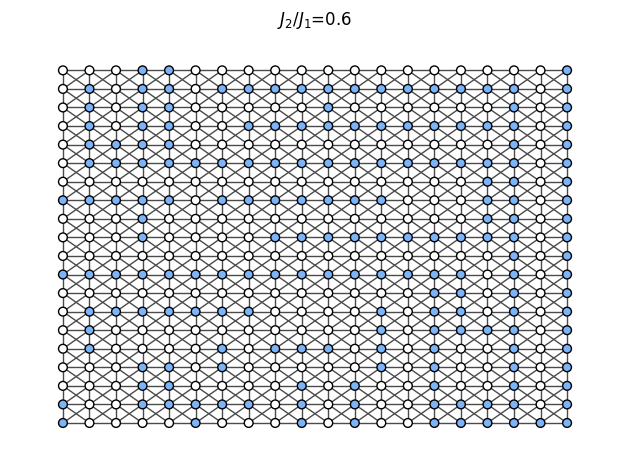

In [28]:
G = bqm.to_networkx_graph()

node_col = []
for node in G.nodes:
    node_col.append(col_map[node])

#pos = {f'{x}-{y}':(y,-x) for x in range(L) for y in range(L)}
nx.draw_networkx_nodes(G, pos=pos, node_color=node_col, edgecolors='k', node_size=40)

nx.draw_networkx_edges(G, pos=pos, edge_color=[76/255, 75/255, 75/255])
plt.axis('off')
plt.title(rf"$J_2/J_1$={ratio}")
plt.tight_layout()
if save:
    string = f"striped_lattice_config_r{ratio}"
    string = string.replace('.', '')
    plt.savefig("../../Results/Ising_Frustrated/DWave/" + string, transparent=True)

In [29]:
dwave.inspector.show(sampleset)

RuntimeError: threads can only be started once